<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg" />
    
**<center>[mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course** </center><br>
Authors: [Yury Kashnitsky](https://yorko.github.io), and [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/). Translated and edited by  [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). [mlcourse.ai](https://mlcourse.ai) is powered by [OpenDataScience (ods.ai)](https://ods.ai/) © 2017—2022

# <center>Assignment #2. Task </center><a class="tocSkip">

## <center>Exploratory Data Analysis (EDA) of US flights with Pandas, Matplotlib, and Seaborn </center><a class="tocSkip">

<img src='https://habrastorage.org/webt/z9/io/wb/z9iowbwlya0sadrr0rf_am0ffm0.jpeg' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Exploratory data analysis with Pandas](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic01_pandas_data_analysis/topic1_pandas_data_analysis.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Notebook](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true), the same as a [Kaggle Notebook](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true), the same as a [Kaggle Notebook](https://www.kaggle.com/kashnitsky/topic-2-part-2-seaborn-and-plotly) 
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 
 - you can also practice with demo assignments, which are simpler and already shared with solutions: [A1 demo](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset), [solution](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset-solution), [A2 demo](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data), [solution](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data-solution)

### Your task is to:
 1. write code and perform computations in the cells below;
 2. choose answers in the [webform](https://docs.google.com/forms/d/1GXgR4TsqoTH_nQkrgluqWBElpK0emfhNzdZWZQObtnw).

*If you are sure that something is not 100% correct with the assignment/solution, please leave your feedback via the mentioned webform ↑*
    
-----

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

# if seaborn is not yet installed, run `pip install seaborn` in terminal
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use('cyberpunk')

# sharper plots
%config InlineBackend.figure_format = 'retina'

* Download the data [archive](https://drive.google.com/file/d/1kOEcWtcTbbrlhVf1wlYtFQUF_kY92U5O/view?usp=sharing) (Archived ~ 114 Mb, unzipped – ~ 690 Mb). No need to unzip – pandas can unzip on the fly.
* Place it in the `"../../_static/data/assignment2"` folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ). Visit this site to find ex. meaning of flight cancellation codes.

Consider the following terms we use:
* unique flight – a record (row) in the dataset
* completed flight – flight that is not cancelled (Cancelled==0 in the dataset)
* flight code – a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code – a three letter airport alias from 'Origin or 'Dest' columns

**Reading data into memory and creating a Pandas ``DataFrame`` object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

In [2]:
dtype = {
    "DayOfWeek": np.uint8,
    "DayofMonth": np.uint8,
    "Month": np.uint8,
    "Cancelled": np.uint8,
    "Year": np.uint16,
    "FlightNum": np.uint16,
    "Distance": np.uint16,
    "UniqueCarrier": str,
    "CancellationCode": str,
    "Origin": str,
    "Dest": str,
    "ArrDelay": np.float32,
    "DepDelay": np.float32,
    "CarrierDelay": np.float32,
    "WeatherDelay": np.float32,
    "NASDelay": np.float32,
    "SecurityDelay": np.float32,
    "LateAircraftDelay": np.float32,
    "DepTime": np.float32,
}

In [3]:
PATH_TO_DATA = Path("~/Documents/GitHub/mlcourse.ai/book/_static/data/assignment2")

In [4]:
# change the path if needed
flights_df = pd.read_csv(
    PATH_TO_DATA / "flights_2008.csv.bz2", usecols=dtype.keys(), dtype=dtype
)

**Check the number of rows and columns and print column names.**

In [5]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [6]:
flights_df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


**Transpose the frame to see all features at once.**

In [7]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003.0,754.0,628.0,926.0,1829.0
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14.0,2.0,14.0,-6.0,34.0
DepDelay,8.0,19.0,8.0,-4.0,34.0
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [8]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               uint16 
 1   Month              uint8  
 2   DayofMonth         uint8  
 3   DayOfWeek          uint8  
 4   DepTime            float32
 5   UniqueCarrier      object 
 6   FlightNum          uint16 
 7   ArrDelay           float32
 8   DepDelay           float32
 9   Origin             object 
 10  Dest               object 
 11  Distance           uint16 
 12  Cancelled          uint8  
 13  CancellationCode   object 
 14  CarrierDelay       float32
 15  WeatherDelay       float32
 16  NASDelay           float32
 17  SecurityDelay      float32
 18  LateAircraftDelay  float32
dtypes: float32(8), object(4), uint16(3), uint8(4)
memory usage: 494.7+ MB


**Get basic statistics of each feature.**

In [9]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,1333.830566,478.068909,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,8.168451,38.501938,-519.0,-10.0,-2.0,12.0,2461.0
DepDelay,6873482.0,9.972576,35.311272,-534.0,-4.0,-1.0,8.0,2467.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [10]:
flights_df["UniqueCarrier"].nunique()

20

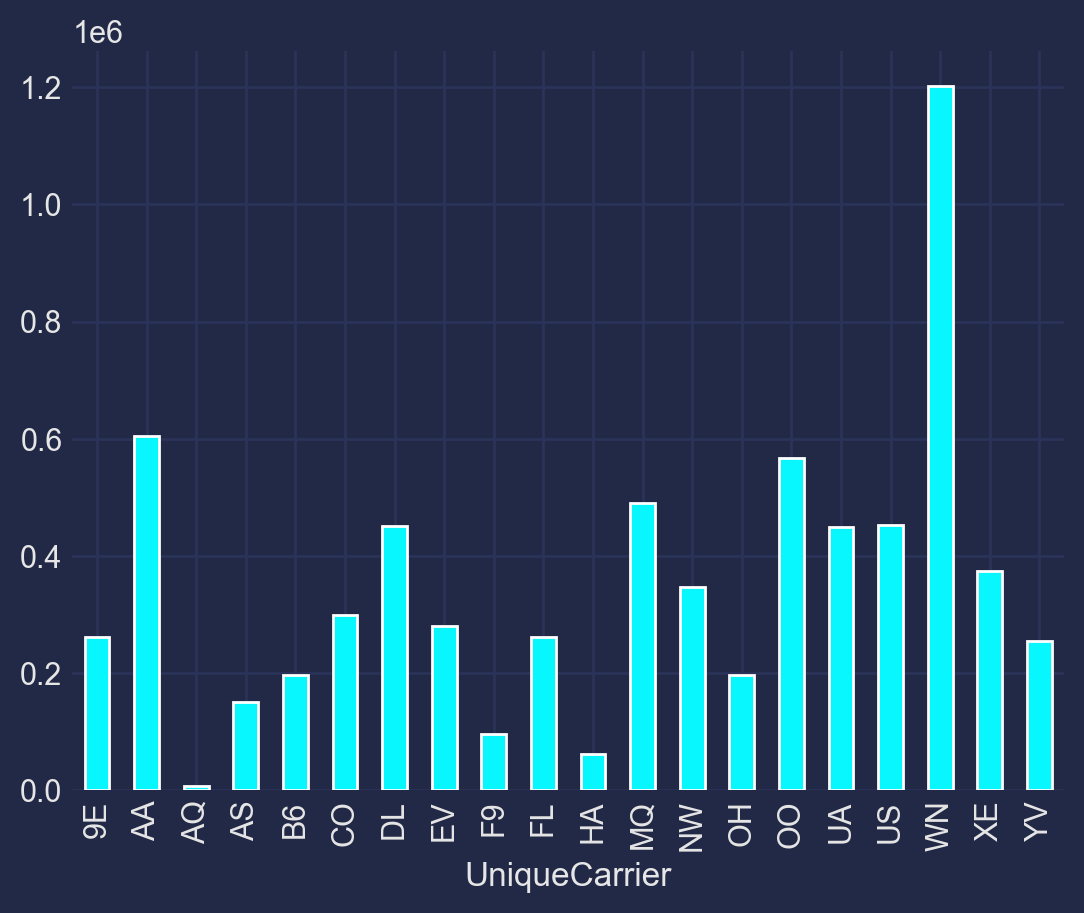

In [11]:
flights_df.groupby("UniqueCarrier").size().plot(kind="bar");

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance traveled in year 2008.**

In [12]:
flights_df.groupby(["UniqueCarrier", "FlightNum"])["Distance"].sum().sort_values(
    ascending=False
).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244
               14           1796244
UA             52           1789722
Name: Distance, dtype: uint64

**Another way:**

In [13]:
flights_df.groupby(["UniqueCarrier", "FlightNum"]).agg(
    {"Distance": [np.mean, np.sum, "count"], "Cancelled": np.sum}
).sort_values(("Distance", "sum"), ascending=False).iloc[0:3]

Distance                Cancelled
                                mean      sum count       sum
UniqueCarrier FlightNum                                      
CO            15         4962.000000  1796244   362         0
              14         4962.000000  1796244   362         0
UA            52         2465.181818  1789722   726         8

**Number of flights by days of week and months:**

In [14]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

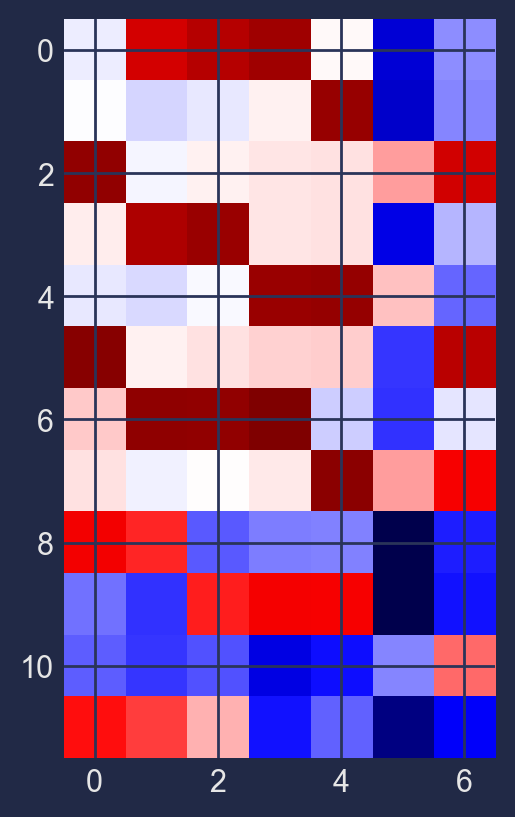

In [15]:
plt.imshow(
    pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
    cmap="seismic",
    interpolation="none",
);

**Flight distance histogram:**

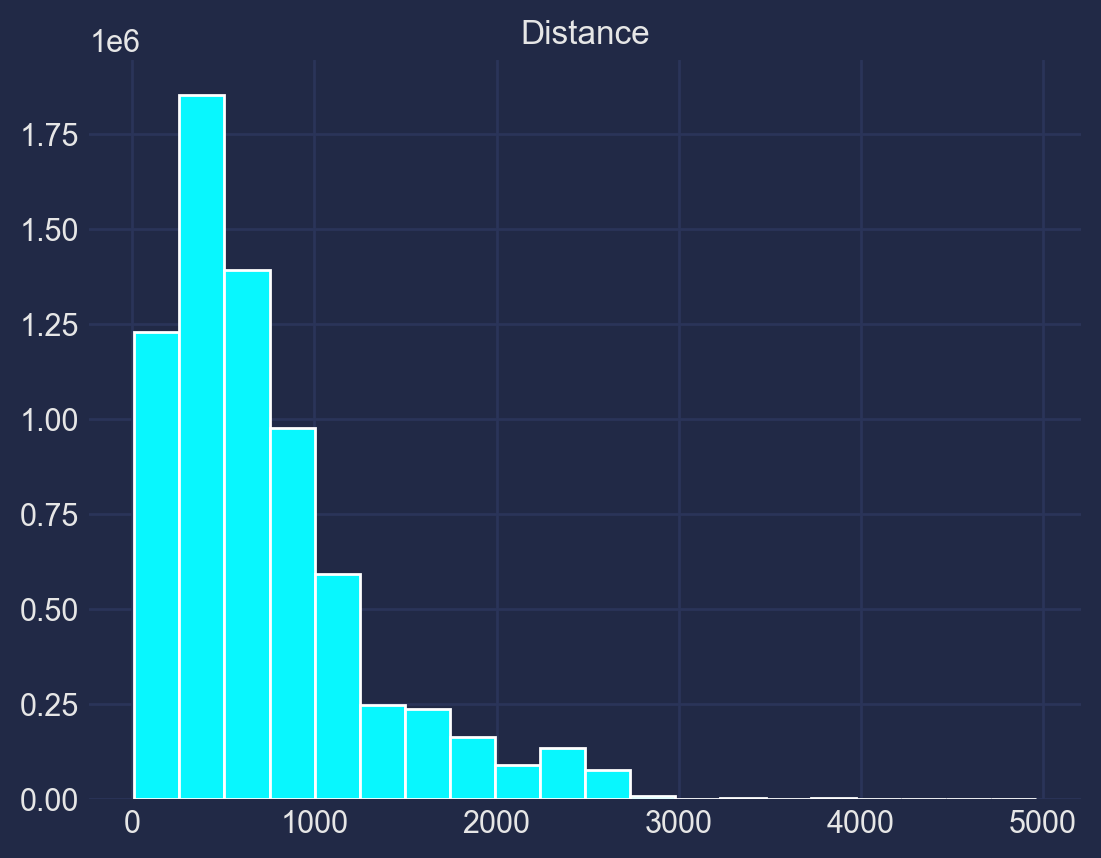

In [16]:
flights_df.hist("Distance", bins=20);

**Making a histogram of flight frequency by date.**

In [17]:
flights_df["Date"] = pd.to_datetime(
    flights_df.rename(columns={"DayofMonth": "Day"})[["Year", "Month", "Day"]]
)

In [18]:
num_flights_by_date = flights_df.groupby("Date").size()

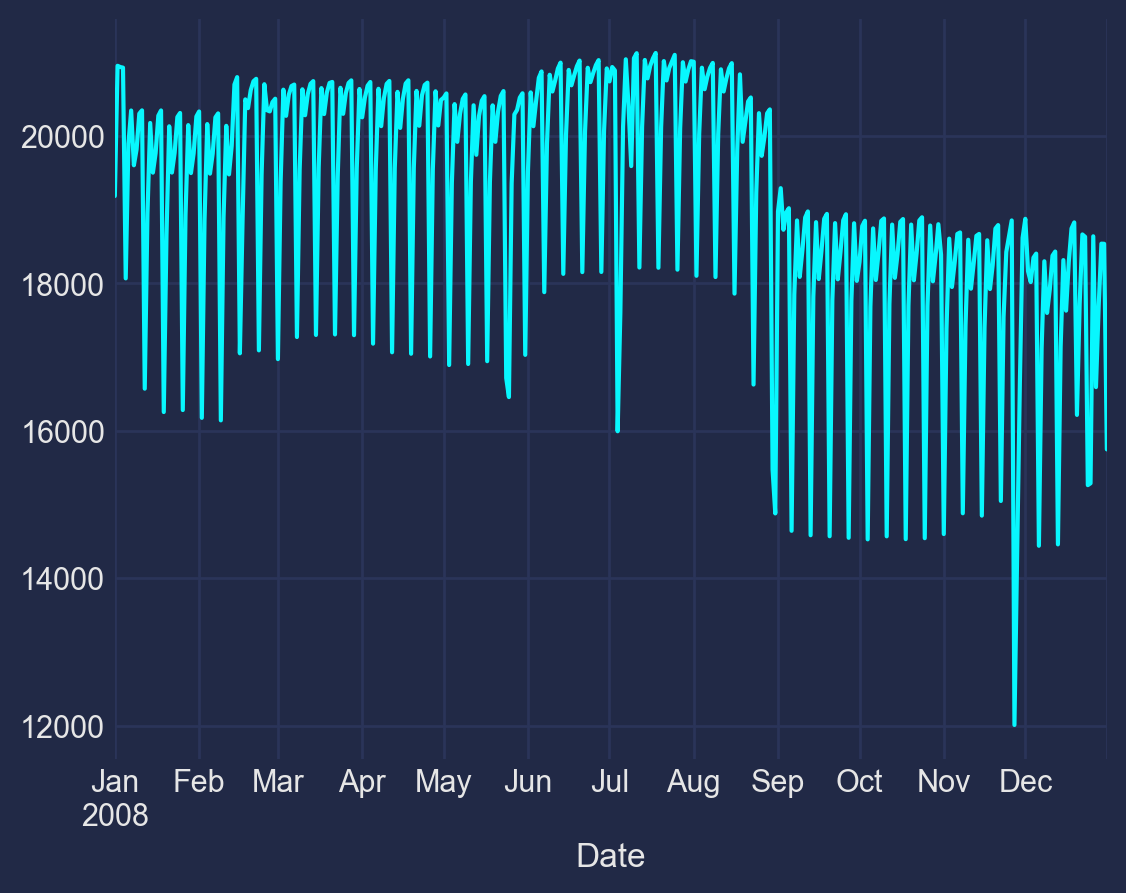

In [19]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

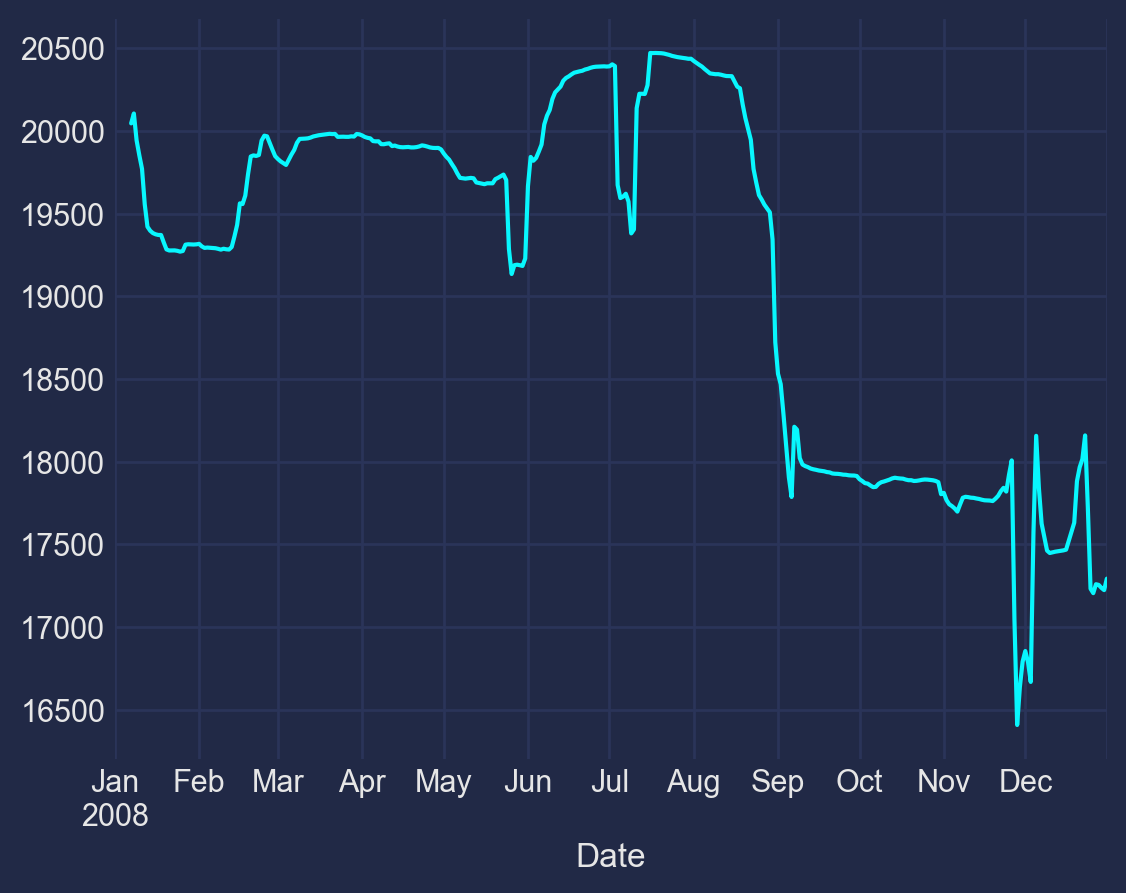

In [20]:
num_flights_by_date.rolling(window=7).mean().plot();

**We'll need a new column in our dataset - departure hour, let's create it.**

As we see, `DepTime` is distributed from 1 to 2400 (it is given in the `hhmm` format, check the [column description](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) again). We'll treat departure hour as `DepTime` // 100 (divide by 100 and apply the `floor` function). However, now we'll have both hour 0 and hour 24. Hour 24 sounds strange, we'll set it to be 0 instead (a typical imperfectness of real data, however, you can check that it affects only 521 rows, which is sort of not a big deal). So now values of a new column `DepHour` will be distributed from 0 to 23. There are some missing values, for now we won't fill in them, just ignore them. 

In [21]:
flights_df["DepHour"] = flights_df["DepTime"] // 100
flights_df["DepHour"].replace(to_replace=24, value=0, inplace=True)

In [22]:
flights_df["DepHour"].describe()

count    6.873482e+06
mean     1.303737e+01
std      4.789944e+00
min      0.000000e+00
25%      9.000000e+00
50%      1.300000e+01
75%      1.700000e+01
max      2.300000e+01
Name: DepHour, dtype: float64

### Now it's your turn. Answer the questions below.

**<font color='red'>Question 1.</font> How many unique carriers are there in our dataset?**

- 10
- 15
- 20
- 25 

In [23]:
print(f'There are {len(pd.unique(flights_df["UniqueCarrier"]))} carriers in the dataset')

There are 20 carriers in the dataset


**<font color='red'>Question 2.</font>  We have  both cancelled and completed flights in the dataset. Check if there are more completed or cancelled flights. What is the difference?** <br>

- Cancelled overweights completed by 329 flights
- Completed overweights cancelled by 6734860 flights
- Cancelled overweights completed by 671 flights
- Completed overweights cancelled by 11088967 flights

The number of completed flights overweights the cancelled by 6734860 flights


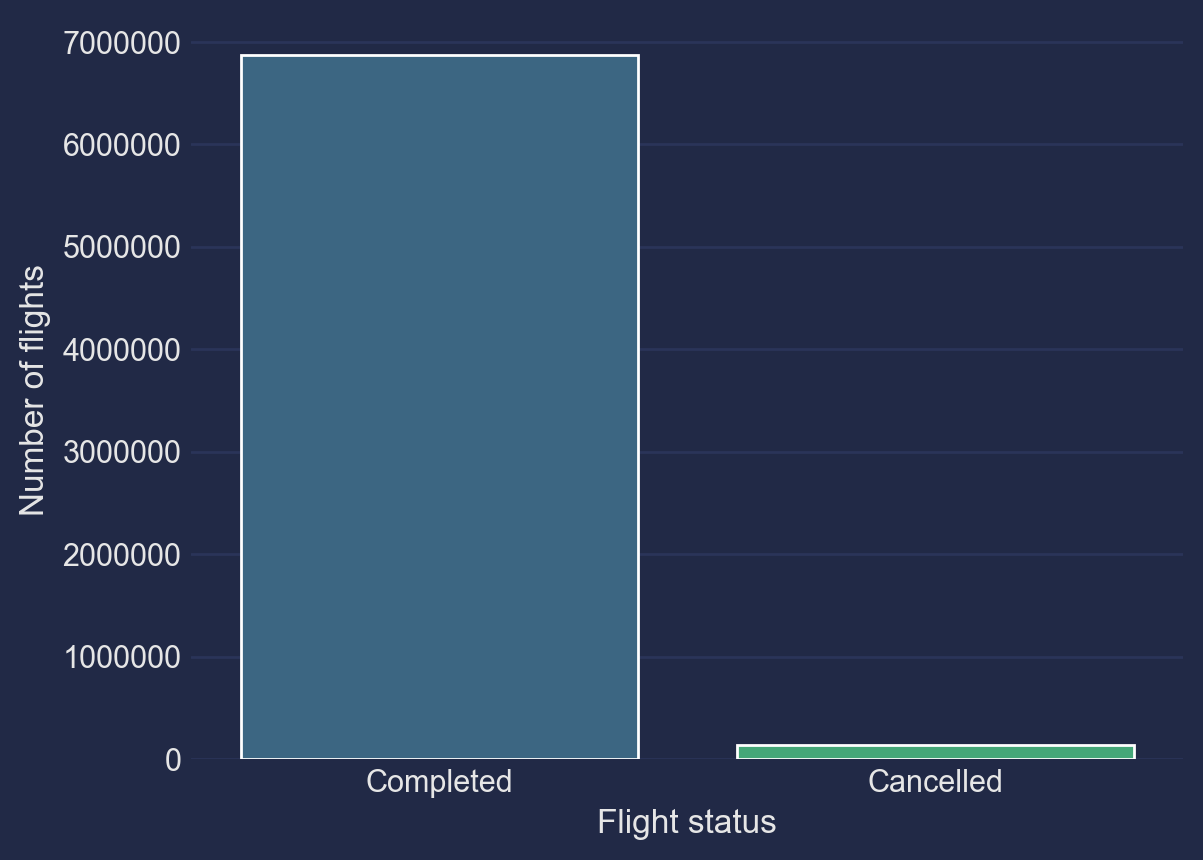

In [24]:
print(
    f'The number of completed flights overweights the cancelled by {abs(flights_df["Cancelled"].value_counts().iloc[0] - flights_df["Cancelled"].value_counts().iloc[1])} flights')

p = sns.barplot(data=pd.DataFrame({"Completed": [flights_df["Cancelled"].value_counts().iloc[0]],
                                   "Cancelled": [flights_df["Cancelled"].value_counts().iloc[1]]}), palette="viridis")
p.set(ylabel="Number of flights", xlabel="Flight status")
plt.ticklabel_format(style="plain", axis="y")

**<font color='red'>Question 3.</font> Find a flight with the longest departure delay and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?**

- yes, ATL
- yes, HNL
- yes, MSP
- no

In [25]:
longest_dep_flight = flights_df.loc[flights_df["DepDelay"] == max(flights_df["DepDelay"])]["Dest"]
longest_arr_delay = flights_df.loc[flights_df["ArrDelay"] == max(flights_df["ArrDelay"])]["Dest"]

print(
    f"The destination for the longest departure delay flight is {longest_dep_flight.values[0]} and the destination for the longest arrival delay flight is {longest_arr_delay.values[0]}")

The destination for the longest departure delay flight is MSP and the destination for the longest arrival delay flight is MSP


**<font color='red'>Question 4.</font> Find the carrier that has the greatest number of cancelled flights.**

- AA
- MQ
- WN
- CO

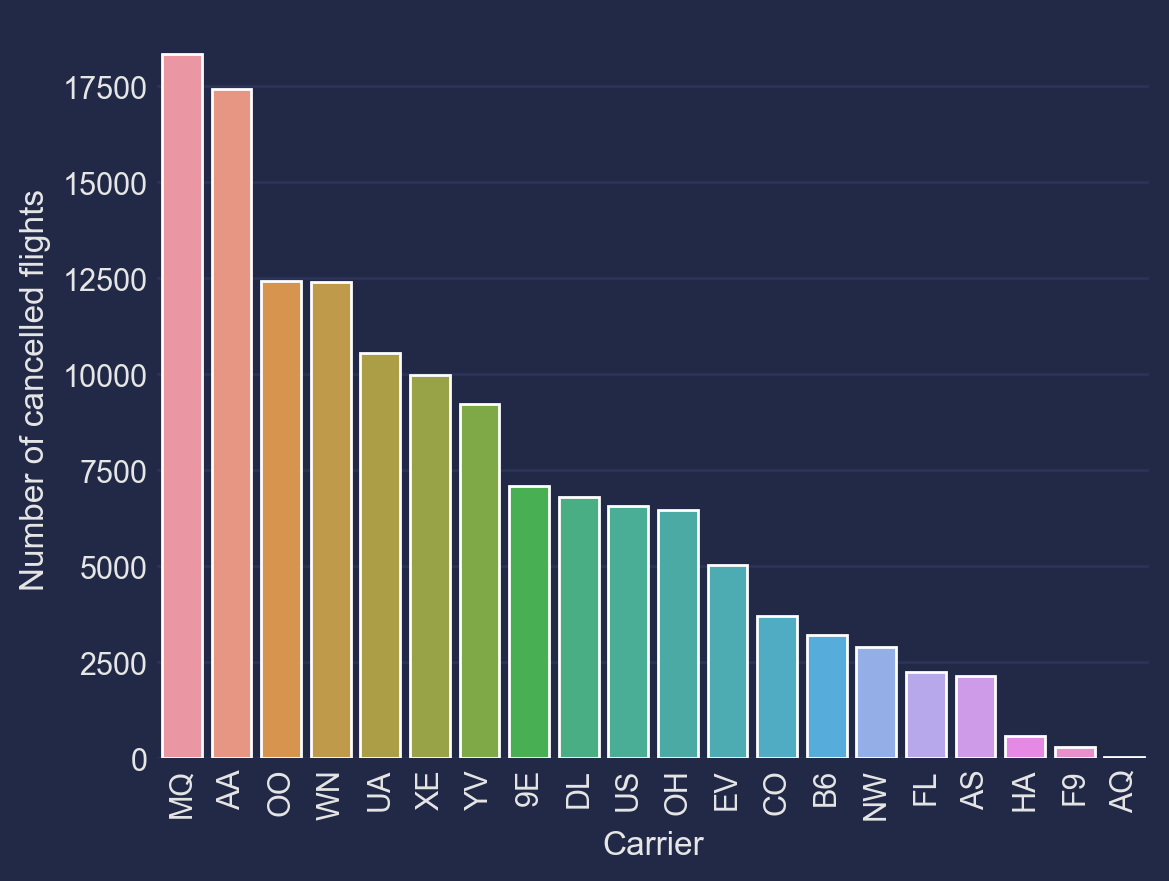

In [26]:
cancelled_df = pd.DataFrame(flights_df.query("Cancelled == 1")["UniqueCarrier"].value_counts()).reset_index()

p1 = sns.barplot(data=cancelled_df, x="UniqueCarrier", y="count")
p1.set(xlabel="Carrier", ylabel="Number of cancelled flights")
for item in p1.get_xticklabels():
    item.set_rotation(90)

**<font color='red'>Question 5.</font> Let's examine departure time and consider distribution by hour (column `DepHour` that we've created earlier). Which hour has the highest percentage of flights?**<br>

*Hint:* Check time format [here](https://www.transtats.bts.gov/Fields.asp?Table_ID=236).

- 1 am 
- 5 am  
- 8 am
- 3 pm

In [27]:
dep_df = flights_df["DepTime"].dropna().map(lambda x: str(int(x))[:-2]).value_counts().reset_index()
print(f"The highest percentage of flights is at {dep_df.sort_values(by='count', ascending=False)['DepTime'].values[0]}")

The highest percentage of flights is at 8


**<font color='red'>Question 6.</font> OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?**<br>

- 2 am 
- 9 pm  
- 8 am  
- 3 am

In [28]:
flights_df.groupby("DepHour")["Cancelled"].mean().sort_values().head()

DepHour
3.0     0.000000
13.0    0.000108
12.0    0.000125
9.0     0.000129
10.0    0.000132
Name: Cancelled, dtype: float64

**<font color='red'>Question 7.</font>  Is there any hour that didn't have any cancelled flights at all? Check all that apply.**

- 3
- 19
- 22
- 4 

In [29]:
flights_df.query("Cancelled == 1").groupby("DepHour")["Cancelled"].size()

DepHour
0.0      7
1.0      4
2.0      1
4.0      1
5.0     24
6.0     80
7.0     83
8.0     79
9.0     56
10.0    57
11.0    59
12.0    53
13.0    47
14.0    57
15.0    73
16.0    73
17.0    73
18.0    66
19.0    81
20.0    51
21.0    82
22.0    57
23.0    24
Name: Cancelled, dtype: int64

**<font color='red'>Question 8.</font> Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.**<br>

*Hint:* Consider only *completed* flights.

- 4
- 7
- 8
- 17 

In [30]:
flights_df.loc[flights_df["Cancelled"] == False].groupby("DepHour").size().sort_values(ascending=False).head()

DepHour
8.0     449145
6.0     446657
11.0    444643
7.0     436617
13.0    435870
dtype: int64

**<font color='red'>Question 9.</font> Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?**<br>

*Hint:* Consider only *completed* flights.

- no, there are no such cases
- yes, at 5-6 am 
- yes, at 9-10 am
- yes, at 2-4 pm

In [31]:
flights_df.loc[(flights_df["Cancelled"] == False) & (flights_df["DepDelay"] < 0)].groupby("DepHour").size().sort_values(
    ascending=False).head()

DepHour
6.0     316527
7.0     296237
8.0     289062
9.0     258571
10.0    242340
dtype: int64

**<font color='red'>Question 10.</font>  Considering only the completed flights by the carrier, that you have found in Question 4, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?**<br>

- at noon
- at 7 am 
- at 8 am
- at 10 am

In [32]:
flights_df.query("UniqueCarrier == 'MQ' & Cancelled == False").groupby("DepHour").size().sort_values(ascending=False)

DepHour
10.0    33063
9.0     32596
11.0    31863
13.0    31295
16.0    31276
6.0     30982
15.0    30904
14.0    30149
12.0    30043
7.0     29840
18.0    29362
17.0    28864
8.0     28757
19.0    25493
20.0    18664
5.0     12732
21.0    12086
22.0     3471
23.0      741
0.0       163
1.0        14
2.0         4
dtype: int64

**<font color='red'>Question 11.</font> Find top-10 carriers in terms of the number of *completed* flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV

In [33]:
flights_df.query("Cancelled == False").groupby("UniqueCarrier").size().sort_values(ascending=False).head(10)

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
dtype: int64

**<font color='red'>Question 12.</font>  Plot distributions of flight cancellation reasons (CancellationCode).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- Carrier
- Weather conditions
- National Air System
- Security reasons

<Axes: xlabel='CancellationCode', ylabel='0'>

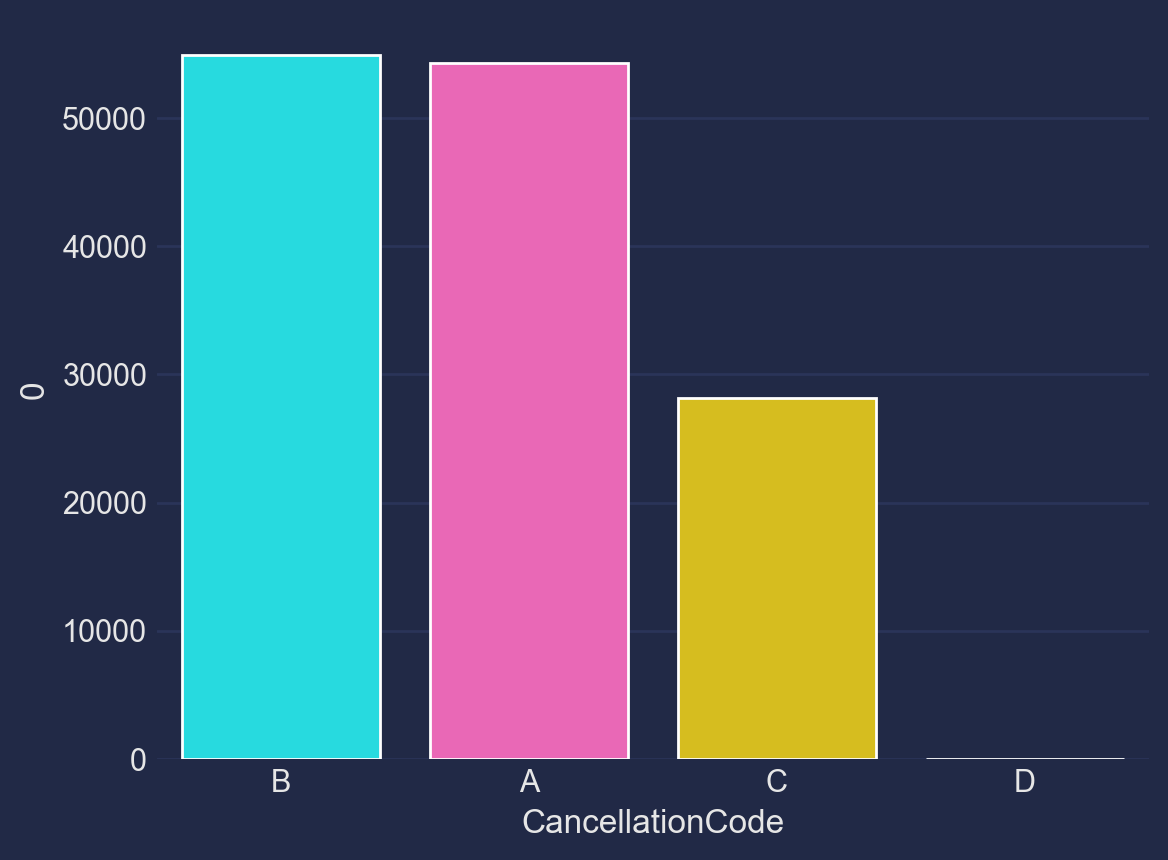

In [34]:
# Weather

sns.barplot(data=flights_df.groupby("CancellationCode").size().sort_values(ascending=False).reset_index(), x="CancellationCode", y=0)

**<font color='red'>Question 13.</font> Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington (JFK-IAD)
 - San-Francisco – Los-Angeles (SFO-LAX)
 - San-Jose – Dallas (SJC-DFW)
 - New-York – San-Francisco (JFK-SFO)

In [35]:
flights_df.groupby(["Origin", "Dest"]).size().sort_values(ascending=False)

Origin  Dest
SFO     LAX     13788
LAX     SFO     13390
OGG     HNL     12383
LGA     BOS     12035
BOS     LGA     12029
                ...  
CID     MKE         1
        DSM         1
CIC     MRY         1
        FAT         1
ROA     CLT         1
Length: 5366, dtype: int64

**<font color='red'>Question 14.</font> Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

_Hint_: consider only positive delays

- 449 
- 539 
- 549 
- 668

In [36]:
flights_df["Route"] = flights_df["Origin"] + "->" + flights_df["Dest"]

top5_delayed = (
    flights_df[flights_df["DepDelay"] > 0]
    .groupby("Route")
    .size()
    .sort_values(ascending=False)
    .head(5)
)
flights_df["Route"].value_counts().head()

Route
SFO->LAX    13788
LAX->SFO    13390
OGG->HNL    12383
LGA->BOS    12035
BOS->LGA    12029
Name: count, dtype: int64

In [37]:
flights_df_top5_delays = flights_df[flights_df["Route"].isin(top5_delayed.index)]
(flights_df_top5_delays["WeatherDelay"] > 0).sum()

668

**<font color='red'>Question 15.</font> Examine the hourly distribution of departure times. Choose all correct statements:**

 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

<Axes: xlabel='DepTime', ylabel='Count'>

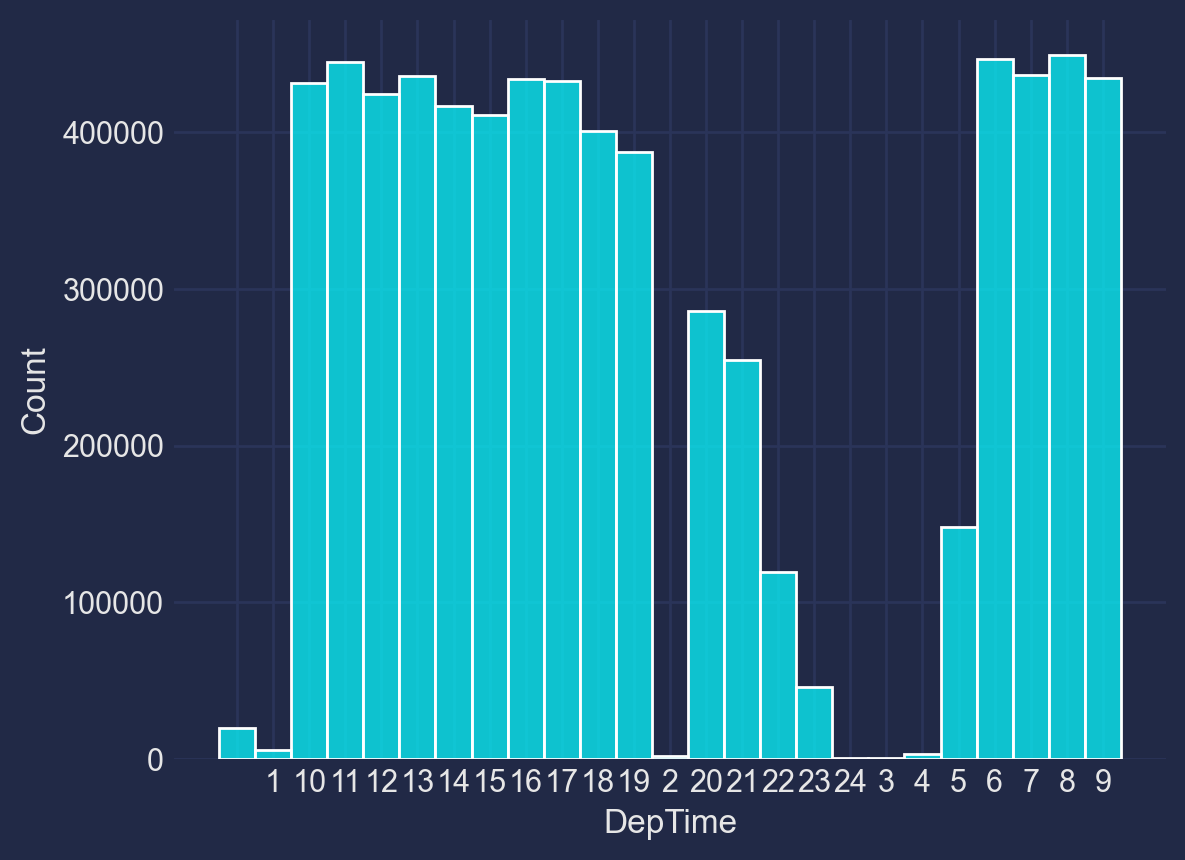

In [38]:
sns.histplot(flights_df["DepTime"].dropna().map(lambda x: str(int(x))[:-2]).sort_values())

**<font color='red'>Question 16.</font> Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days). 
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.

_Hint_: Look for official meteorological winter months for the Northern Hemisphere.

In [39]:
flights_df.groupby("DayOfWeek").size()

DayOfWeek
1    1036201
2    1032049
3    1039665
4    1032224
5    1035166
6     857536
7     976887
dtype: int64

In [40]:
flights_df.groupby("Month").size()

Month
1     605765
2     569236
3     616090
4     598126
5     606293
6     608665
7     627931
8     612279
9     540908
10    556205
11    523272
12    544958
dtype: int64

**<font color='red'>Question 17.</font> Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- October has the lowest number of cancellations due to weather. 
- The highest number of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers. 
- Flights cancellations due to National Air System are more frequent than those due to carriers.

In [41]:
flights_df.groupby(["Month", "CancellationCode"]).size()

Month  CancellationCode
1      A                    6635
       B                    6711
       C                    3962
2      A                    6090
       B                   10034
       C                    4470
       D                       2
3      A                    6038
       B                    7520
       C                    2621
       D                       4
4      A                    7312
       B                    1479
       C                    1564
5      A                    3157
       B                    1461
       C                    1608
       D                       3
6      A                    4251
       B                    3448
       C                    3232
7      A                    5292
       B                    2612
       C                    2694
8      A                    3852
       B                    3582
       C                    2401
9      A                    2246
       B                    6478
       C           

*Reminder on Cancellatoin codes:*
```
A - Carrier 
B - Weather 
C - National Air System 
D - Security
```

**<font color='red'>Question 18.</font> Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April

In [42]:
flights_df.query("CancellationCode == 'A'").groupby("Month").size().sort_values(ascending=False).head(5)

Month
4    7312
1    6635
2    6090
3    6038
7    5292
dtype: int64

**<font color='red'>Question 19.</font> Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA

In [43]:
flights_df.query("Cancelled == 1 & CancellationCode == 'A'").groupby("UniqueCarrier").size().sort_values(ascending=False)

UniqueCarrier
AA    9609
WN    6554
UA    6352
YV    5020
9E    4329
US    3857
MQ    3644
OO    3162
DL    3113
EV    1384
OH    1328
AS    1222
NW    1119
FL     815
CO     746
XE     697
B6     665
HA     563
F9     109
AQ      42
dtype: int64

**<font color='red'>Question 20.</font> Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
([Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).**

- EV
- OO
- AA
- AQ 

In [44]:
flights_df.query("ArrDelay > 0 & DepDelay > 0").groupby("UniqueCarrier")[["ArrDelay", "DepDelay"]].median().sort_values(by=["DepDelay", "ArrDelay"])

,ArrDelay,DepDelay
UniqueCarrier,,
AQ,10.0,9.0
HA,11.0,9.0
F9,16.0,13.0
WN,16.0,18.0
DL,21.0,18.0
AS,21.0,19.0
US,22.0,19.0
NW,24.0,19.0
CO,22.0,20.0
